In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [12]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [13]:
# Load datasets
traffic_df = pd.read_csv('data/Traffic.csv')

In [14]:
traffic_df['Traffic Situation'].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

In [15]:
# 1. Distribution of vehicle counts for cars, bikes, buses, and trucks
fig = make_subplots(rows=2, cols=2, subplot_titles=("Car Counts", "Bike Counts", "Bus Counts", "Truck Counts"))

fig.add_trace(go.Histogram(x=traffic_df['CarCount'], name='Car Counts', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Histogram(x=traffic_df['BikeCount'], name='Bike Counts', marker_color='#ff7f0e'), row=1, col=2)
fig.add_trace(go.Histogram(x=traffic_df['BusCount'], name='Bus Counts', marker_color='#2ca02c'), row=2, col=1)
fig.add_trace(go.Histogram(x=traffic_df['TruckCount'], name='Truck Counts', marker_color='#d62728'), row=2, col=2)

fig.update_layout(title_text='Distribution of Vehicle Counts', title_x=0.5, showlegend=False, template='plotly_white')
fig.update_xaxes(title_text="Count")
fig.update_yaxes(title_text="Frequency")
fig.show()

In [16]:
# 3. Distribution of traffic situations
fig = px.pie(traffic_df, names='Traffic Situation', title='Traffic Situation Distribution', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Traffic Situation Distribution', title_x=0.5, template='plotly_white')
fig.show()

In [17]:
# 4. Vehicle count vary by day of the week
fig = make_subplots(rows=2, cols=2, subplot_titles=("Car Counts by Day", "Bike Counts by Day", "Bus Counts by Day", "Truck Counts by Day"))

fig.add_trace(go.Box(x=traffic_df['Day of the week'], y=traffic_df['CarCount'], name='Car Counts', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Box(x=traffic_df['Day of the week'], y=traffic_df['BikeCount'], name='Bike Counts', marker_color='#ff7f0e'), row=1, col=2)
fig.add_trace(go.Box(x=traffic_df['Day of the week'], y=traffic_df['BusCount'], name='Bus Counts', marker_color='#2ca02c'), row=2, col=1)
fig.add_trace(go.Box(x=traffic_df['Day of the week'], y=traffic_df['TruckCount'], name='Truck Counts', marker_color='#d62728'), row=2, col=2)

fig.update_layout(title_text='Vehicle Counts by Day of the Week', title_x=0.5, showlegend=False, template='plotly_white')
fig.update_xaxes(title_text="Day of the Week")
fig.update_yaxes(title_text="Count")
fig.show()

In [18]:
# 5-8. Relationship between vehicle counts and traffic situation
fig = make_subplots(rows=2, cols=2, subplot_titles=("Car Counts by Traffic Situation", "Bike Counts by Traffic Situation", "Bus Counts by Traffic Situation", "Truck Counts by Traffic Situation"))

fig.add_trace(go.Box(x=traffic_df['Traffic Situation'], y=traffic_df['CarCount'], name='Car Counts', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Box(x=traffic_df['Traffic Situation'], y=traffic_df['BikeCount'], name='Bike Counts', marker_color='#ff7f0e'), row=1, col=2)
fig.add_trace(go.Box(x=traffic_df['Traffic Situation'], y=traffic_df['BusCount'], name='Bus Counts', marker_color='#2ca02c'), row=2, col=1)
fig.add_trace(go.Box(x=traffic_df['Traffic Situation'], y=traffic_df['TruckCount'], name='Truck Counts', marker_color='#d62728'), row=2, col=2)

fig.update_layout(title_text='Vehicle Counts by Traffic Situation', title_x=0.5, showlegend=False, template='plotly_white')
fig.update_xaxes(title_text="Traffic Situation")
fig.update_yaxes(title_text="Count")
fig.show()

In [19]:
# 9. Total vehicle count by traffic situation
fig = px.box(traffic_df, x='Traffic Situation', y='Total', title='Total Vehicle Count by Traffic Situation', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Total Vehicle Count by Traffic Situation', title_x=0.5, xaxis_title='Traffic Situation', yaxis_title='Total Count', template='plotly_white')
fig.show()

In [21]:
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [22]:
# 11. Busiest hours of the day for traffic
traffic_df['Hour'] = pd.to_datetime(traffic_df['Time'], format='%I:%M:%S %p').dt.hour
fig = px.box(traffic_df, x='Hour', y='Total', title='Total Vehicle Count by Hour', color_discrete_sequence=['#9467bd'])
fig.update_layout(title_text='Total Vehicle Count by Hour', title_x=0.5, xaxis_title='Hour', yaxis_title='Total Count', template='plotly_white')
fig.show()

In [23]:
# 12. Traffic situation distribution by day of the week
fig = px.box(traffic_df, x='Day of the week', y='Traffic Situation', title='Traffic Situation by Day of the Week', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Traffic Situation by Day of the Week', title_x=0.5, xaxis_title='Day of the Week', yaxis_title='Traffic Situation', template='plotly_white')
fig.show()

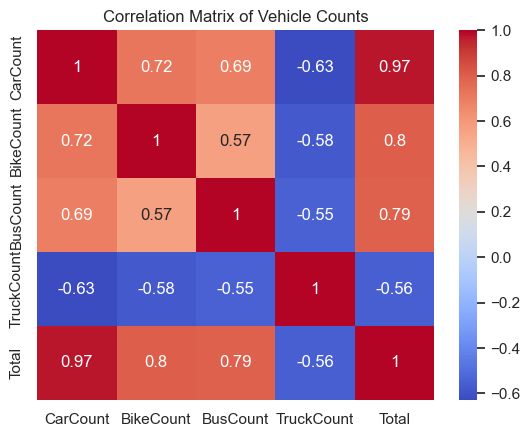

In [24]:
# 13. Correlations between different vehicle types
corr_matrix = traffic_df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Vehicle Counts')
plt.show()

In [25]:
# 16. Distribution of vehicle counts between weekdays and weekends
traffic_df['Weekend'] = traffic_df['Day of the week'].isin(['Saturday', 'Sunday'])
fig = make_subplots(rows=2, cols=2, subplot_titles=("Car Counts by Weekend", "Bike Counts by Weekend", "Bus Counts by Weekend", "Truck Counts by Weekend"))

fig.add_trace(go.Box(x=traffic_df['Weekend'], y=traffic_df['CarCount'], name='Car Counts', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Box(x=traffic_df['Weekend'], y=traffic_df['BikeCount'], name='Bike Counts', marker_color='#ff7f0e'), row=1, col=2)
fig.add_trace(go.Box(x=traffic_df['Weekend'], y=traffic_df['BusCount'], name='Bus Counts', marker_color='#2ca02c'), row=2, col=1)
fig.add_trace(go.Box(x=traffic_df['Weekend'], y=traffic_df['TruckCount'], name='Truck Counts', marker_color='#d62728'), row=2, col=2)

fig.update_layout(title_text='Vehicle Counts by Weekend', title_x=0.5, showlegend=False, template='plotly_white')
fig.update_xaxes(title_text="Weekend")
fig.update_yaxes(title_text="Count")
fig.show()


In [26]:
# 18. Distribution of traffic situations by hour
fig = px.box(traffic_df, x='Hour', y='Traffic Situation', title='Traffic Situation by Hour', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Traffic Situation by Hour', title_x=0.5, xaxis_title='Hour', yaxis_title='Traffic Situation', template='plotly_white')
fig.show()

In [28]:
# 20. Distribution of total vehicle counts for each day of the week
fig = px.box(traffic_df, x='Day of the week', y='Total', title='Total Vehicle Count by Day of the Week', color_discrete_sequence=['#9467bd'])
fig.update_layout(title_text='Total Vehicle Count by Day of the Week', title_x=0.5, xaxis_title='Day of the Week', yaxis_title='Total Count', template='plotly_white')
fig.show()

In [29]:
# 22. Variance in vehicle counts across vehicle types
variance_df = traffic_df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].var().reset_index()
variance_df.columns = ['Vehicle Type', 'Variance']
fig = px.bar(variance_df, x='Vehicle Type', y='Variance', title='Variance in Vehicle Counts', color_discrete_sequence=['#ff7f0e'])
fig.update_layout(title_text='Variance in Vehicle Counts', title_x=0.5, xaxis_title='Vehicle Type', yaxis_title='Variance', template='plotly_white')
fig.show()


In [30]:
# 23. Distribution of vehicle counts by source and day of the week
fig = make_subplots(rows=2, cols=2, subplot_titles=("Car Counts by Source and Day", "Bike Counts by Source and Day", "Bus Counts by Source and Day", "Truck Counts by Source and Day"))

fig.add_trace(go.Box(x=traffic_df['Day of the week'], y=traffic_df['CarCount'], name='Car Counts', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Box(x=traffic_df['Day of the week'], y=traffic_df['BikeCount'], name='Bike Counts', marker_color='#ff7f0e'), row=1, col=2)
fig.add_trace(go.Box(x=traffic_df['Day of the week'], y=traffic_df['BusCount'], name='Bus Counts', marker_color='#2ca02c'), row=2, col=1)
fig.add_trace(go.Box(x=traffic_df['Day of the week'], y=traffic_df['TruckCount'], name='Truck Counts', marker_color='#d62728'), row=2, col=2)

fig.update_layout(title_text='Distribution of Vehicle Counts by Source and Day of the Week', title_x=0.5, showlegend=False, template='plotly_white')
fig.show()


In [31]:
# 25. Peak traffic hours for each vehicle type
fig = make_subplots(rows=2, cols=2, subplot_titles=("Car Counts by Hour", "Bike Counts by Hour", "Bus Counts by Hour", "Truck Counts by Hour"))

fig.add_trace(go.Box(x=traffic_df['Hour'], y=traffic_df['CarCount'], name='Car Counts', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Box(x=traffic_df['Hour'], y=traffic_df['BikeCount'], name='Bike Counts', marker_color='#ff7f0e'), row=1, col=2)
fig.add_trace(go.Box(x=traffic_df['Hour'], y=traffic_df['BusCount'], name='Bus Counts', marker_color='#2ca02c'), row=2, col=1)
fig.add_trace(go.Box(x=traffic_df['Hour'], y=traffic_df['TruckCount'], name='Truck Counts', marker_color='#d62728'), row=2, col=2)

fig.update_layout(title_text='Vehicle Counts by Hour', title_x=0.5, showlegend=False, template='plotly_white')
fig.update_xaxes(title_text="Hour")
fig.update_yaxes(title_text="Count")
fig.show()

In [32]:
# 26. Average vehicle count for each type change over time
# Exclude non-numeric columns from the mean calculation
numeric_cols = traffic_df.select_dtypes(include=['number']).columns

# Group by 'Time' and calculate the mean for numeric columns
avg_time_counts = traffic_df.groupby('Time')[numeric_cols].mean().reset_index()

# Create the line plot
fig = px.line(avg_time_counts, x='Time', y=['CarCount', 'BikeCount', 'BusCount', 'TruckCount'], title='Average Vehicle Counts Over Time')
fig.update_layout(title_text='Average Vehicle Counts Over Time', title_x=0.5, xaxis_title='Time', yaxis_title='Average Count', template='plotly_white')

# Display the plot
fig.show()

In [33]:
# 29. Distribution of traffic situations by date
fig = px.box(traffic_df, x='Date', y='Traffic Situation', title='Traffic Situation by Date', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Traffic Situation by Date', title_x=0.5, xaxis_title='Date', yaxis_title='Traffic Situation', template='plotly_white')
fig.show()


In [34]:
# Identify and remove outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

vehicle_counts = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
combined_df = remove_outliers(traffic_df, vehicle_counts)

In [35]:
# Check for missing values and duplicates
print("Missing values in each column:")
print(combined_df.isnull().sum())

print(f"Number of duplicate rows: {combined_df.duplicated().sum()}")

Missing values in each column:
Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
Hour                 0
Weekend              0
dtype: int64
Number of duplicate rows: 0


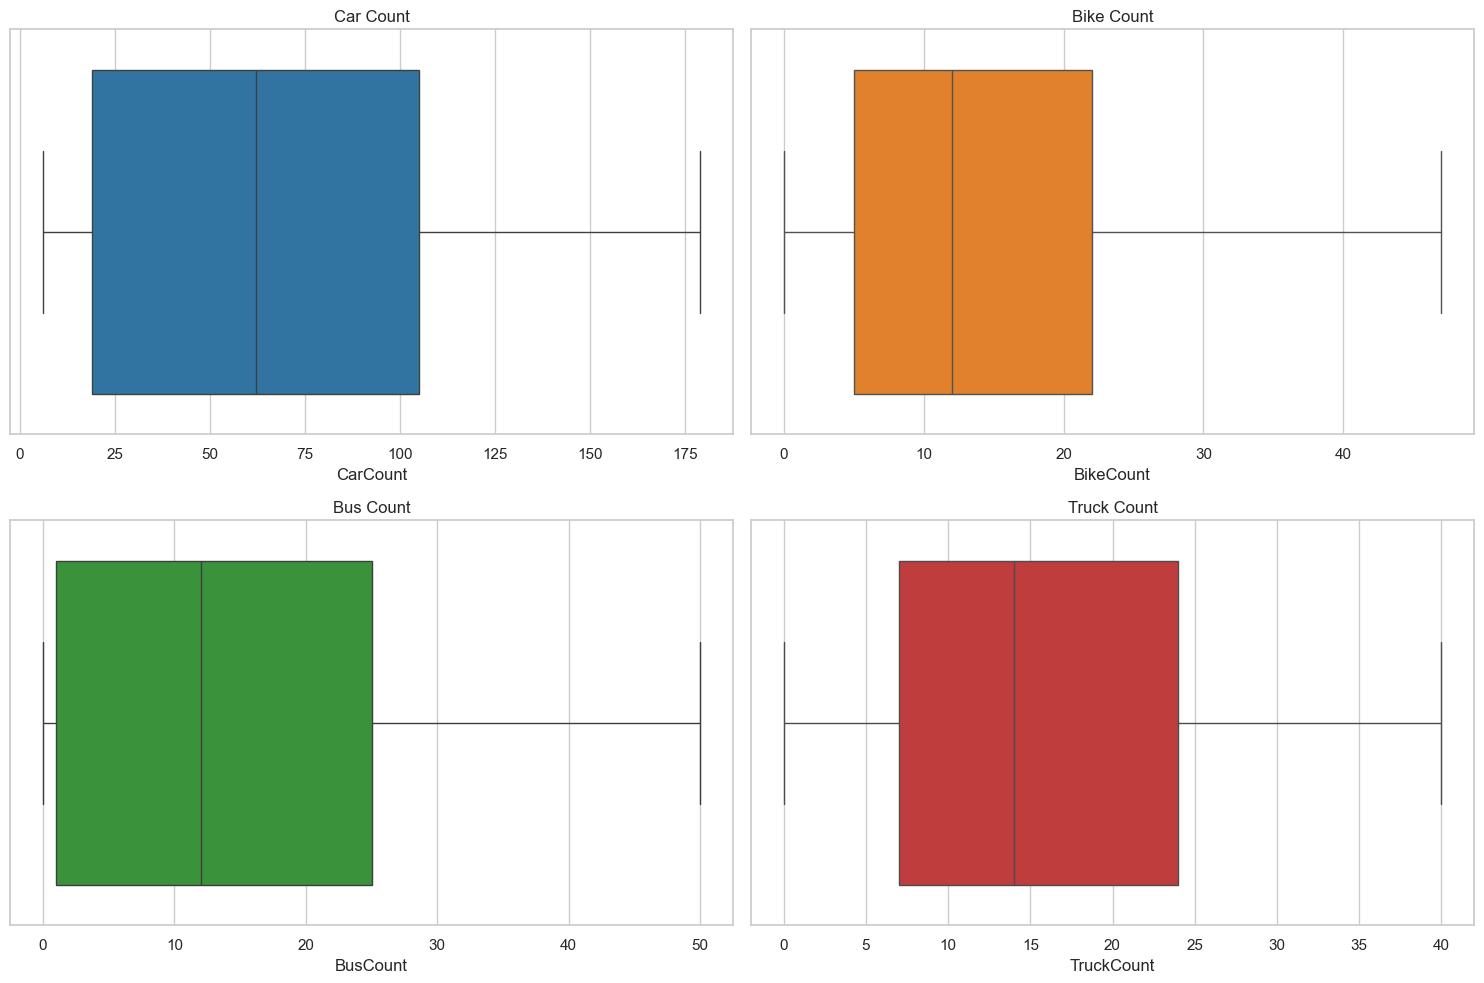

In [36]:
# Plot boxplots to visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data=combined_df, x='CarCount', ax=axes[0, 0], color='#1f77b4')
sns.boxplot(data=combined_df, x='BikeCount', ax=axes[0, 1], color='#ff7f0e')
sns.boxplot(data=combined_df, x='BusCount', ax=axes[1, 0], color='#2ca02c')
sns.boxplot(data=combined_df, x='TruckCount', ax=axes[1, 1], color='#d62728')
axes[0, 0].set_title('Car Count')
axes[0, 1].set_title('Bike Count')
axes[1, 0].set_title('Bus Count')
axes[1, 1].set_title('Truck Count')
plt.tight_layout()
plt.show()

In [37]:
# Check normality for each vehicle count before normalization
def check_normality(data):
    stat, p = shapiro(data)
    return p > 0.05

print("Normality check before normalization:")
car_normal = check_normality(combined_df['CarCount'])
bike_normal = check_normality(combined_df['BikeCount'])
bus_normal = check_normality(combined_df['BusCount'])
truck_normal = check_normality(combined_df['TruckCount'])

print(f"Car count normality: {car_normal}")
print(f"Bike count normality: {bike_normal}")
print(f"Bus count normality: {bus_normal}")
print(f"Truck count normality: {truck_normal}")

# Normalize data using QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
combined_df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']] = scaler.fit_transform(combined_df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']])

# Check normality for each vehicle count after normalization
print("Normality check after normalization:")
car_normal = check_normality(combined_df['CarCount'])
bike_normal = check_normality(combined_df['BikeCount'])
bus_normal = check_normality(combined_df['BusCount'])
truck_normal = check_normality(combined_df['TruckCount'])

print(f"Car count normality: {car_normal}")
print(f"Bike count normality: {bike_normal}")
print(f"Bus count normality: {bus_normal}")
print(f"Truck count normality: {truck_normal}")

Normality check before normalization:
Car count normality: False
Bike count normality: False
Bus count normality: False
Truck count normality: False
Normality check after normalization:
Car count normality: False
Bike count normality: False
Bus count normality: False
Truck count normality: False


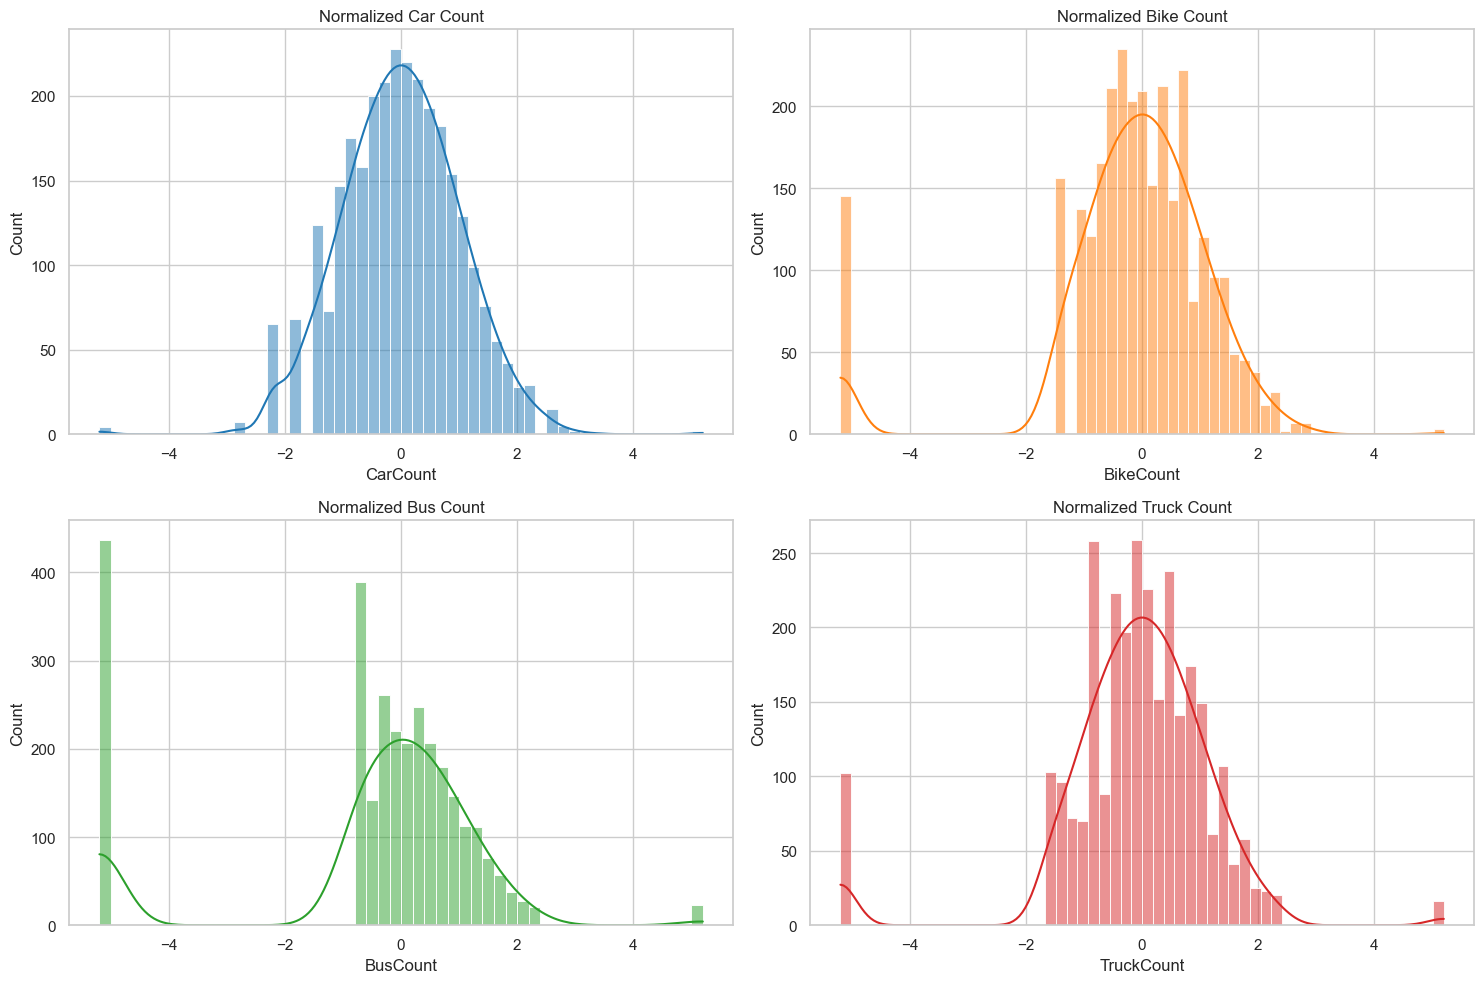

In [38]:
# Check distribution after normalization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(combined_df['CarCount'], ax=axes[0, 0], kde=True, color='#1f77b4')
sns.histplot(combined_df['BikeCount'], ax=axes[0, 1], kde=True, color='#ff7f0e')
sns.histplot(combined_df['BusCount'], ax=axes[1, 0], kde=True, color='#2ca02c')
sns.histplot(combined_df['TruckCount'], ax=axes[1, 1], kde=True, color='#d62728')
axes[0, 0].set_title('Normalized Car Count')
axes[0, 1].set_title('Normalized Bike Count')
axes[1, 0].set_title('Normalized Bus Count')
axes[1, 1].set_title('Normalized Truck Count')
plt.tight_layout()
plt.show()

In [39]:
# Prepare the features and target
X = combined_df.drop(columns=['Traffic Situation'])
y = combined_df['Traffic Situation']

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Preprocessing pipeline for numeric and categorical features
numeric_features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Hour']
categorical_features = ['Time', 'Date', 'Day of the week', 'Weekend']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [46]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CarCount', 'BikeCount',
                                                   'BusCount', 'TruckCount',
                                                   'Total', 'Hour']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Time', 'Date',
                                                   'Day of the week',
                                                   'Weekend'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [47]:
# Make predictions
y_pred = model.predict(X_test)

In [48]:
# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9844827586206897
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       118
           1       0.98      0.95      0.97        61
           2       1.00      0.93      0.97        61
           3       0.98      0.99      0.99       340

    accuracy                           0.98       580
   macro avg       0.99      0.97      0.98       580
weighted avg       0.98      0.98      0.98       580



In [49]:
# Inverse transform the normalized values to their original scale
inverse_transformed_data = scaler.inverse_transform(combined_df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']])
combined_df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']] = inverse_transformed_data

In [50]:
# Check some predictions with the inverse-transformed data
input_features = X_test.iloc[23].to_dict()
input_features_df = pd.DataFrame([input_features])

predicted_output = model.predict(input_features_df)
print(f"Input features: {input_features}")
print(f"Predicted output for input features: {predicted_output}")

Input features: {'Time': '7:00:00 PM', 'Date': 20, 'Day of the week': 'Friday', 'CarCount': -0.037645951375149304, 'BikeCount': 0.6195781807120453, 'BusCount': -0.5554621702769806, 'TruckCount': -1.6159454578478454, 'Total': 84, 'Hour': 19, 'Weekend': False}
Predicted output for input features: [2]


In [51]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

In [38]:
# loaded_model = joblib.load('model.joblib')